Early chemical evolution models of galaxies utilized closed box models of said galaxy. No gas infall from outside, no mergers, and certainly no outflow of enriched gas. This results in a certain distribution of stellar metallicities that is gives out significantly more metal-poor stars than the distributions found observationally in G-dwarfs within the Galaxy. Similar G-dwarf problems have been more recently detected in other galaxies, so it seems that the problem might be universal rather than Galactic. Inconstant metal yield, IMF differences, and "inhomogeneous" chemical evolution, among others, have been proposed as solutions. It seems that the consensus solution, however, is a carefully leaky box model that keeps the gas fraction relatively constant. It is clear that the closed box model isn't right, since we have direct observations of outflows. At the same time, we haven't seen inflows directly, so we aren't on absolutely sound footing about this interpretation. 

In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = np.genfromtxt('Homework6Problem2Data.csv', delimiter = ',')
redshifts = Data[:,0]
mags = Data[:,1]
nums = Data[:,2]
errs = Data[:,3]
dets = Data[:,4]

loc4 = np.where(redshifts == 4.)
loc6 = np.where(redshifts == 6.)
loc8 = np.where(redshifts == 8.)

In [3]:
absfluxes = 10**(-.4*(mags - 8.9))*1e-26
lums = (4*np.pi*3.086e17**2)*absfluxes/3.846e26

fluxerrs = 10**(-.4*(mags - errs - 8.9))*1e-26 - absfluxes
lumerrs = (4*np.pi*3.086e17**2)*fluxerrs/3.846e26

In [4]:
lums

array([  1.34583689e-04,   8.49165669e-05,   5.35787315e-05,
         3.38058942e-05,   2.13300772e-05,   1.34583689e-05,
         8.49165669e-06,   5.35787315e-06,   3.38058942e-06,
         2.13300772e-06,   1.34583689e-06,   1.15078032e-04,
         7.26093297e-05,   4.58133899e-05,   2.89062948e-05,
         1.82386390e-05,   1.15078032e-05,   7.26093297e-06,
         3.63908691e-06,   1.44874659e-06,   5.76756407e-07,
         1.58851905e-04,   1.00228776e-04,   6.32400825e-05,
         3.99017945e-05,   2.51763303e-05,   1.58851905e-05,
         1.00228776e-05,   6.32400825e-06,   3.16951220e-06,
         1.26180553e-06])

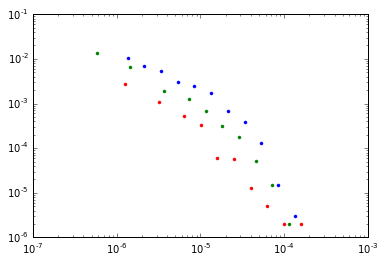

In [5]:
plt.loglog(lums[loc4], nums[loc4], '.')
plt.loglog(lums[loc6], nums[loc6], '.')
plt.loglog(lums[loc8], nums[loc8], '.')

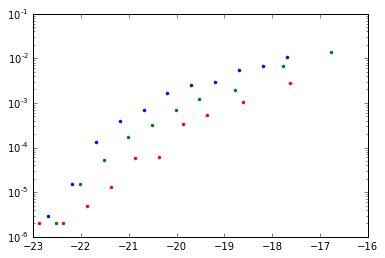

In [6]:
plt.semilogy(mags[loc4], nums[loc4], '.')
plt.semilogy(mags[loc6], nums[loc6], '.')
plt.semilogy(mags[loc8], nums[loc8], '.')

In [7]:
# if I'm using luminosities

#def model(theta, L):
#    sch_model = theta[0] * (L/theta[1])**(theta[2]) * np.exp(-L/theta[1])
#    return sch_model

# if I'm using magnitudes
def model(theta, M):
    sch_model  = .4* np.log(10)* theta[0]*(10**(.4*(theta[1]-M)))**(theta[2]+1)*np.exp(-10**(.4*(theta[1]-M)))
    return sch_model

def logL(theta, M, N, err):
    return -.5* np.sum((N - model(theta, M))**2./err**2.)

# if I'm using luminosities

#def lnprior(theta):
#    if (theta[1] > 1e-2) | (theta[1] < 1e-6):
#        return -np.inf
#    if (theta[0] > 1e-2) | (theta[0] < 1e-7):
#        return -np.inf
#    if (theta[2] > 0):
#        return -np.inf
#    else:
#        return 0.

# if I'm using magnitudes

def lnprior(theta):
    if (theta[1] < -25) | (theta[1] > -18):
        return -np.inf
    if (theta[0] > 1e-2) | (theta[0] < 1e-7):
        return -np.inf
    if (theta[2] > 0) | (theta[2] < -5.):
        return -np.inf
    else:
        return 0.



def lnprob(theta, L, N, err):
    if lnprior(theta) == -np.inf:
        return -np.inf
    else:
        return logL(theta, L, N, err) + lnprior(theta)

ndim, nwalkers = 3, 100
pos = [[1e-4, -20, -1]*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = [mags[loc4], nums[loc4], errs[loc4]])
sampler.run_mcmc(pos, 50000)

/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


(array([[  2.44144482e-03,  -2.06824295e+01,  -1.50596570e+00],
        [ -9.54797748e-05,   4.06103691e+01,  -8.85727406e-01],
        [  1.39250810e-04,   1.17407265e+00,   1.90062850e+00],
        [ -1.51847820e-04,   4.01062573e+01,   1.03131175e+00],
        [ -2.70495484e-05,   1.53970327e+01,  -1.37647793e+00],
        [ -4.45317370e-05,   2.59074211e+01,   1.45856956e+00],
        [  2.62037452e-03,  -2.06652298e+01,  -1.44745596e+00],
        [  7.04167270e-06,  -6.23119990e-01,   6.51233179e-01],
        [  1.18251447e-04,   2.83976809e+01,  -5.41531517e-01],
        [  1.62572558e-03,  -2.09745771e+01,  -1.63040121e+00],
        [ -2.22408594e-05,   1.74671675e+01,  -1.52784846e+00],
        [  6.13956032e-05,   2.73761321e+01,   1.68800075e+00],
        [ -2.49607874e-05,  -2.98910191e+01,   6.64649811e-01],
        [ -3.68380789e-05,  -8.36482134e+00,   1.86818357e+00],
        [  2.07688266e-03,  -2.07899795e+01,  -1.58837644e+00],
        [  2.62843573e-03,  -2.06487590e

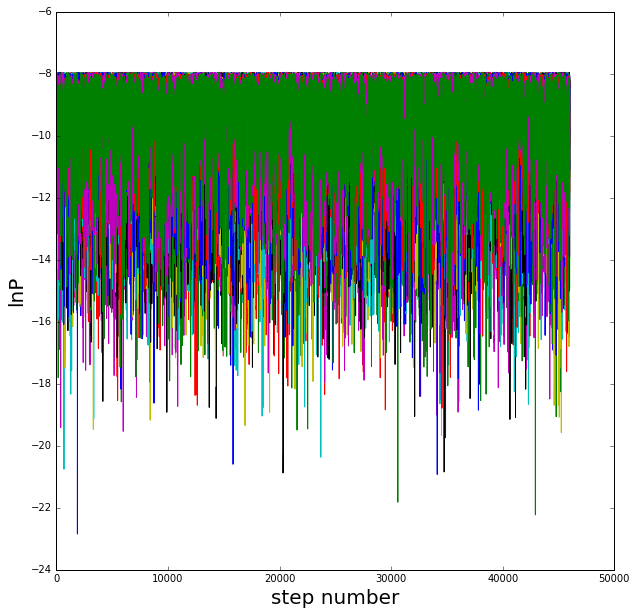

In [8]:
plt.figure(figsize = (10,10))
[plt.plot(sampler.lnprobability[i,4000:]) for i in range(100)]
plt.xlabel('step number', fontsize = 20)
plt.ylabel('lnP', fontsize = 20)

In [9]:
np.max(sampler.lnprobability[:,4000:])

-7.9508769177492136

In [10]:
redsamples = []
maxln = np.max(sampler.lnprobability[:, 4000:])
for i in range(100):
    if np.all(sampler.lnprobability[i, 4000:] > maxln - 30):
        redsamples.append(sampler.chain[i,4000:, :])
        
redsamples = np.array(redsamples)

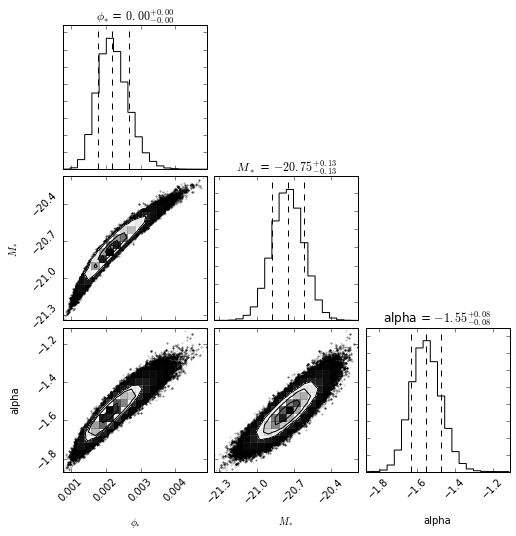

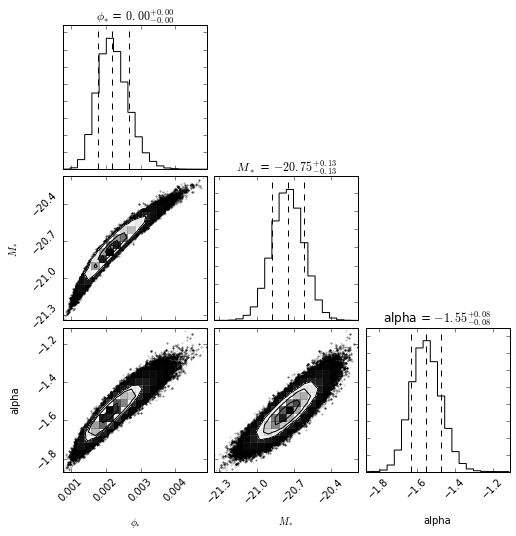

In [11]:
import corner

samples = redsamples.reshape((-1, ndim))
corner.corner(samples, labels=['$\phi_{*}$', '$M_*$', 'alpha'], fontsize = 20, show_titles = True, quantiles=[0.16, 0.5, 0.84])


In [64]:
print(np.mean(redsamples[:, :, 0]))
print(np.mean(redsamples[:, :, 1]))
print(np.mean(redsamples[:, :, 2]))

print(np.std(redsamples[:, :, 0]))
print(np.std(redsamples[:, :, 1]))
print(np.std(redsamples[:, :, 2]))

# Bouwens finds 1.97 pm .3 e - 3 for phi_star, -20.88 pm -.08 for M_star, and -1.64 pm -.04 for alpha. 
# Only phi_star is within their error, but my error bars are larger and make them seem more comparable.

0.00222609556019
-20.7482271004
-1.55008371703
0.000442906426219
0.127630556659
0.078301817725


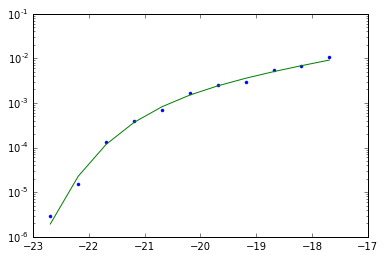

In [13]:
theta = [np.mean(redsamples[:,:,0]), np.mean(redsamples[:,:,1]), np.mean(redsamples[:,:,2])]

plt.semilogy(mags[loc4], nums[loc4], '.')
plt.semilogy(mags[loc4], .4* np.log(10)* theta[0]*(10**(.4*(theta[1]-mags[loc4])))**(theta[2]+1)*np.exp(-10**(.4*(theta[1]-mags[loc4]))))

/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


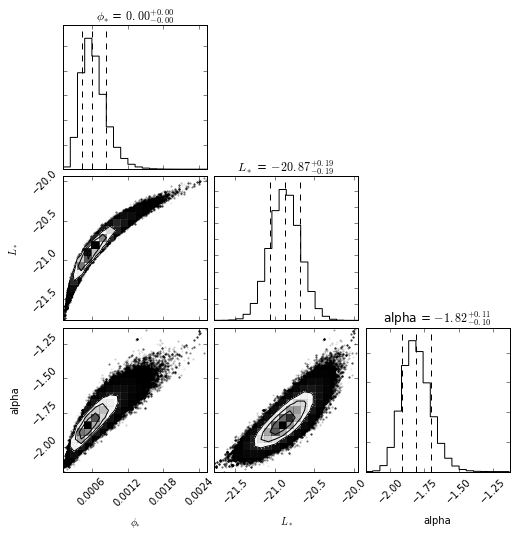

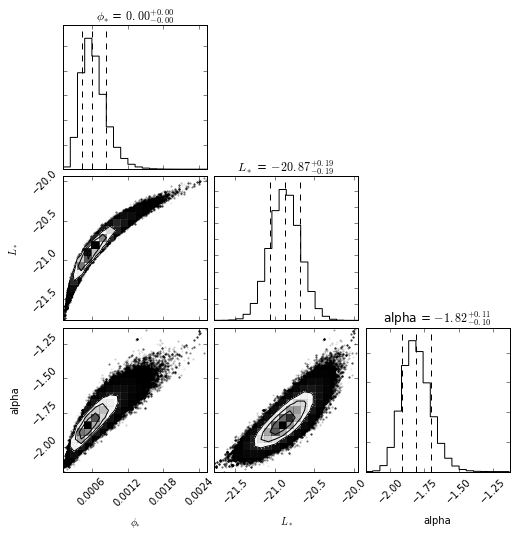

In [14]:
ndim, nwalkers = 3, 100
pos = [[1e-4, -20, -1]*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = [mags[loc6], nums[loc6], errs[loc6]])
sampler.run_mcmc(pos, 50000)

redsamples6 = []
maxln = np.max(sampler.lnprobability[:, 4000:])
for i in range(100):
    if np.all(sampler.lnprobability[i, 4000:] > maxln - 30.):
        redsamples6.append(sampler.chain[i,4000:, :])
        
redsamples6 = np.array(redsamples6)

import corner

samples = redsamples6.reshape((-1, ndim))
corner.corner(samples, labels=['$\phi_{*}$', '$L_*$', 'alpha'], fontsize = 20, show_titles = True, quantiles=[0.16, 0.5, 0.84])



In [63]:
print(np.mean(redsamples6[:, :, 0]))
print(np.mean(redsamples6[:, :, 1]))
print(np.mean(redsamples6[:, :, 2]))

print(np.std(redsamples6[:, :, 0]))
print(np.std(redsamples6[:, :, 1]))
print(np.std(redsamples6[:, :, 2]))

# Bouwens finds 0.5 pm .22 e - 3 for phi_star, -20.94 pm -.2 for M_star, and -1.87 pm -.1 for alpha. 
# My assessment is pretty close!

0.000635776257822
-20.8712850578
-1.80818166432
0.000216627324293
0.19375431829
0.10492270758


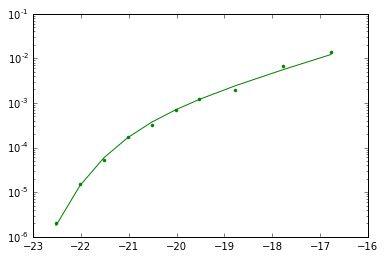

In [23]:
theta = [np.mean(redsamples6[:,:,0]), np.mean(redsamples6[:,:,1]), np.mean(redsamples6[:,:,2])]

plt.semilogy(mags[loc6], nums[loc6], '.g')
plt.semilogy(mags[loc6], .4* np.log(10)* theta[0]*(10**(.4*(theta[1]-mags[loc6])))**(theta[2]+1)*np.exp(-10**(.4*(theta[1]-mags[loc6]))), 'g')

/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


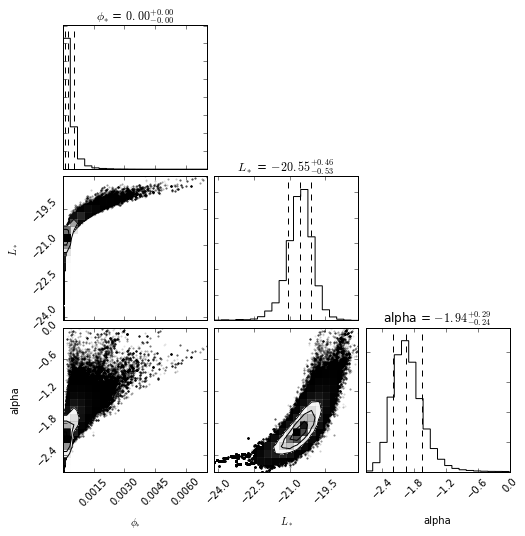

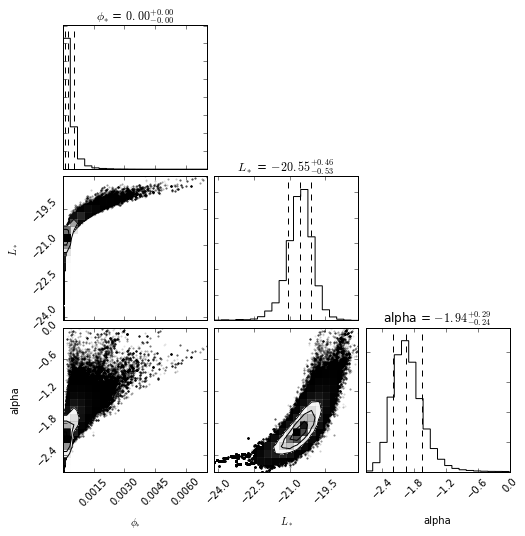

In [24]:
ndim, nwalkers = 3, 100
pos = [[1e-4, -20, -1]*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = [mags[loc8], nums[loc8], errs[loc8]])
sampler.run_mcmc(pos, 50000)

redsamples8 = []
maxln = np.max(sampler.lnprobability[:, 4000:])
for i in range(100):
    if np.all(sampler.lnprobability[i, 4000:] > maxln - 30.):
        redsamples8.append(sampler.chain[i,4000:, :])
        
redsamples8 = np.array(redsamples8)

import corner

samples = redsamples8.reshape((-1, ndim))
corner.corner(samples, labels=['$\phi_{*}$', '$L_*$', 'alpha'], fontsize = 20, show_titles = True, quantiles=[0.16, 0.5, 0.84])



In [62]:
print(np.mean(redsamples8[:, 4000:, 0]))
print(np.mean(redsamples8[:, 4000:, 1]))
print(np.mean(redsamples8[:, 4000:, 2]))

# Bouwens finds 0.21 pm .2 e - 3 for phi_star, -20.63 pm -.36 for M_star, and -2.02 pm -.23 for alpha. 
# Here again, largely because of the wide error bars, we kick the Monte Carlo ball between the Markov Chain uprights

0.000322148776803
-20.5883242539
-1.91144836649


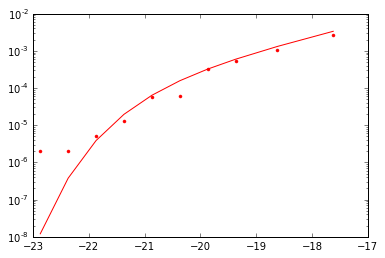

In [27]:
theta = [np.mean(redsamples8[:,:,0]), np.mean(redsamples8[:,:,1]), np.mean(redsamples8[:,:,2])]

plt.semilogy(mags[loc8], nums[loc8], '.r')
plt.semilogy(mags[loc8], .4* np.log(10)* theta[0]*(10**(.4*(theta[1]-mags[loc8])))**(theta[2]+1)*np.exp(-10**(.4*(theta[1]-mags[loc8]))), 'r')

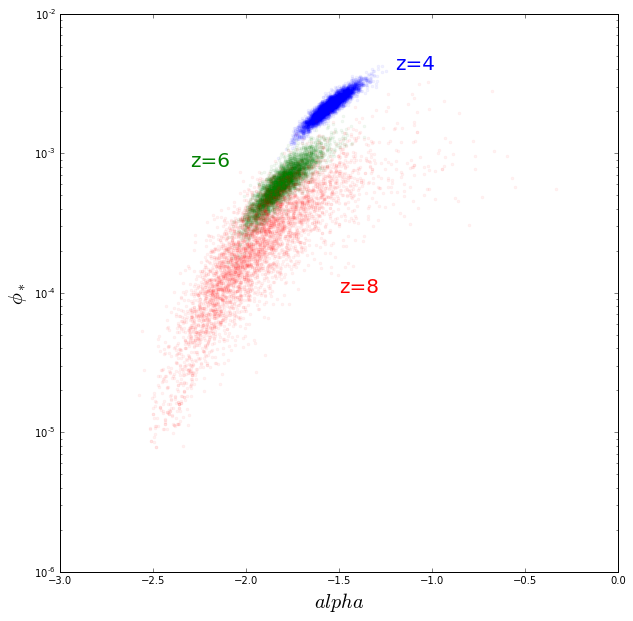

In [55]:
import scipy.stats

plt.figure(figsize=(10,10))

plt.semilogy(redsamples[::10,::50,2], redsamples[::10,::50,0], '.b', alpha = .05);
plt.semilogy(redsamples6[::10,::50,2], redsamples6[::10,::50,0], '.g', alpha = .05);
plt.semilogy(redsamples8[::10,::50,2], redsamples8[::10,::50,0], '.r', alpha = .05);
plt.xlabel('$alpha$', fontsize = 20)
plt.ylabel('$\phi_*$', fontsize = 20)
plt.annotate('z=4', color = 'b', xy = (-1, 3e-3), xytext = (-1.2, 4e-3), fontsize = 20)
plt.annotate('z=6', color = 'g', xy = (-1, 3e-3), xytext = (-2.3, 8e-4), fontsize = 20)
plt.annotate('z=8', color = 'r', xy = (-1, 3e-3), xytext = (-1.5, 1e-4), fontsize = 20)

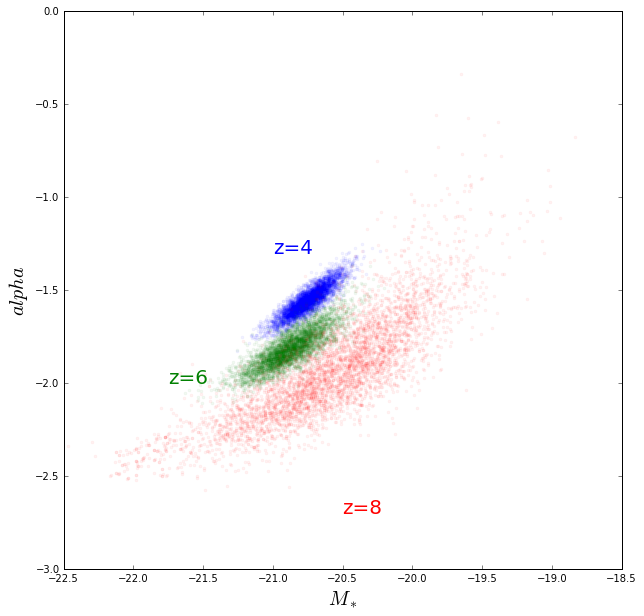

In [59]:
plt.figure(figsize=(10,10))

plt.plot(redsamples[::10,::50,1], redsamples[::10,::50,2], '.b', alpha = .05);
plt.plot(redsamples6[::10,::50,1], redsamples6[::10,::50,2], '.g', alpha = .05);
plt.plot(redsamples8[::10,::50,1], redsamples8[::10,::50,2], '.r', alpha = .05);
plt.xlabel('$M_*$', fontsize = 20)
plt.ylabel('$alpha$', fontsize = 20)
plt.annotate('z=4', color = 'b', xy = (-21, -1.5), xytext = (-21., -1.3), fontsize = 20)
plt.annotate('z=6', color = 'g', xy = (-21, -1.5), xytext = (-21.75, -2), fontsize = 20)
plt.annotate('z=8', color = 'r', xy = (-21, -1.5), xytext = (-20.5, -2.7), fontsize = 20)

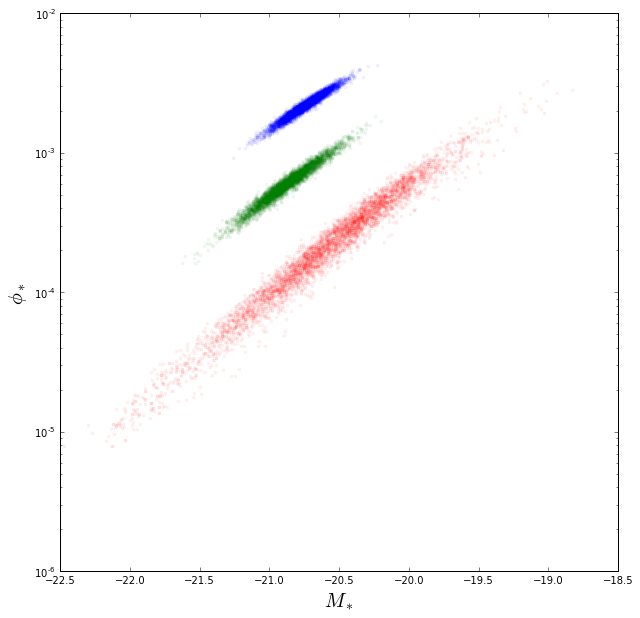

In [60]:
plt.figure(figsize=(10,10))

plt.semilogy(redsamples[::10,::50,1], redsamples[::10,::50,0], '.b', alpha = .05);
plt.semilogy(redsamples6[::10,::50,1], redsamples6[::10,::50,0], '.g', alpha = .05);
plt.semilogy(redsamples8[::10,::50,1], redsamples8[::10,::50,0], '.r', alpha = .05);
plt.xlabel('$M_*$', fontsize = 20)
plt.ylabel('$\phi_*$', fontsize = 20)